![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [14]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

In [15]:
# Start coding here
# Use as many cells as you need

print(crimes.info())
print(crimes.describe(include= 'all'))
print(crimes.shape)
print(crimes.columns)
crimes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB
None
               DR_NO            Date Rptd  ...  Status Desc         LOCATION
count   1.857150e+05   

DR_NO  Date Rptd  ...  Status Desc                                  LOCATION
0  220314085 2022-07-22  ...  Invest Cont   2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont   3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                         1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont   6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont   1200 W  7TH                          ST
5  221216052 2022-07-07  ...  Invest Cont    500 W  75TH                         ST
6  221515929 2022-10-10  ...  Invest Cont   5700    CARTWRIGHT                   AV
7  231906599 2023-03-03  ...  Invest Cont  14500    WILLOWGREEN                  LN
8  231207476 2023-02-27  ...  Invest Cont   8800    HAAS                         AV
9  231506571 2023-03-03  ...  Invest Cont  12300    EMELITA                      ST

[10 rows x 12 columns]

## Which hour has the highest frequency of crimes? Store as an integer variable called _peak_crime_hour_.

In [16]:
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

<AxesSubplot: xlabel='HOUR OCC', ylabel='count'>

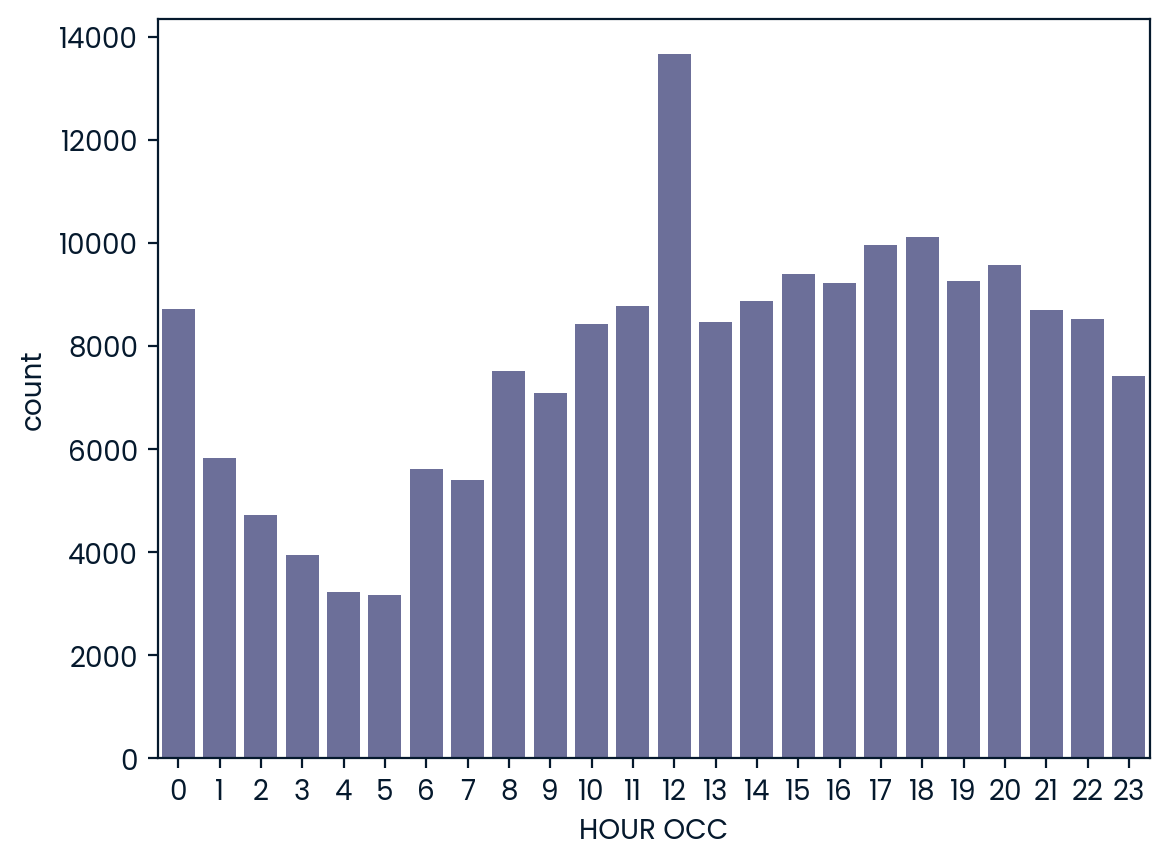

In [17]:
sns.countplot(data= crimes, x= 'HOUR OCC')

In [18]:
peak_crime_time = crimes['HOUR OCC'].mode()
peak_crime_hour =  peak_crime_time[0]
print("The peak crime hour is, ", peak_crime_hour)

The peak crime hour is,  12


**Datacamp**

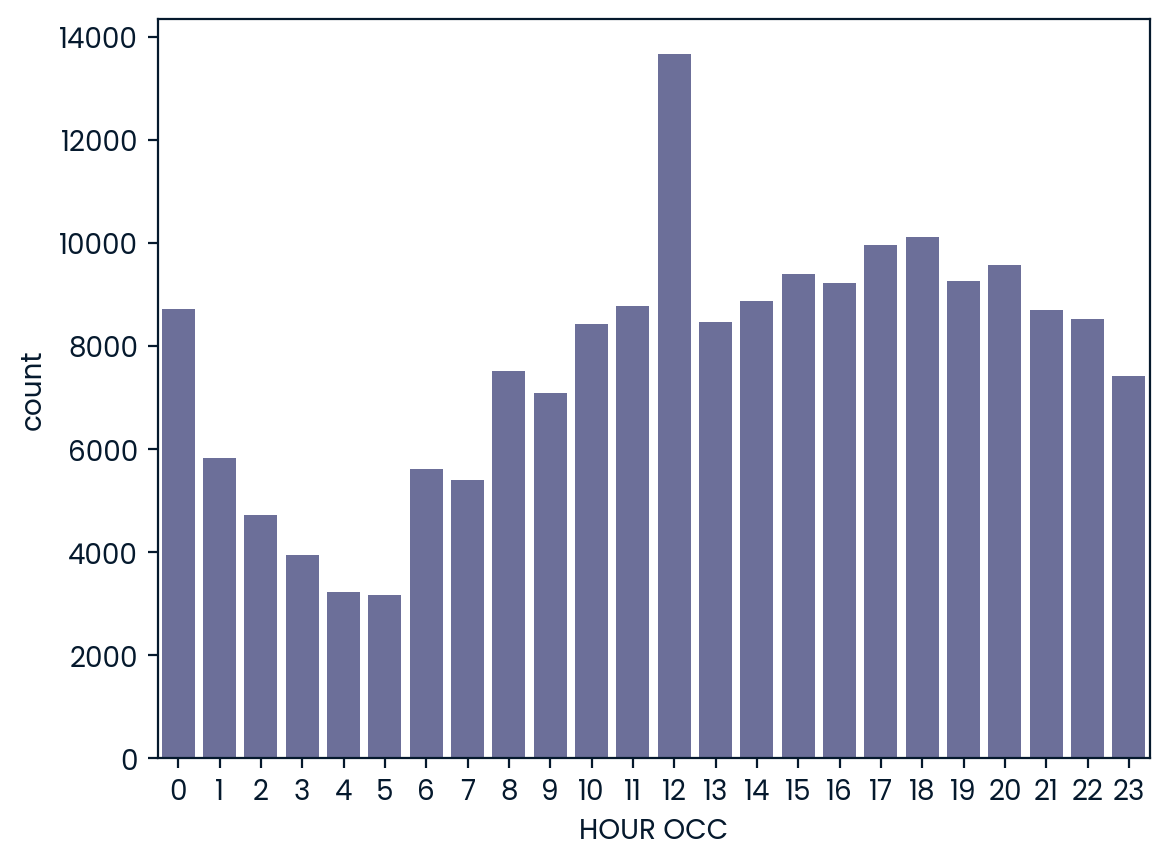

In [19]:
# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
crimes.head()

# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called _peak_night_crime_location_

In [20]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION', 'HOUR OCC'],
      dtype='object')

In [21]:
list_night_time = [22,23,0,1,2,3]

night_time = crimes[crimes['HOUR OCC'].isin(list_night_time)]

In [22]:
peak_night_crime_location = night_time['AREA NAME'].value_counts().idxmax()

In [23]:
print("The area with the highest crime at night time is ", peak_night_crime_location)

The area with the highest crime at night time is  Central


**Datacamp**

In [24]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4

night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"

peak_night_crime_location = night_time.groupby("AREA NAME",as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",ascending=False).iloc[0]["AREA NAME"]

# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


## Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called _victim_ages_, with age group labels **"0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+"** as the index and the frequency of crimes as the values.

In [25]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_tags = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["Age Categories"] = pd.cut(crimes['Vict Age'], bins = age_bins, labels= age_tags)

victims_ages = crimes['Age Categories'].value_counts()

**Datacamp**

In [26]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64
